# Sales data EDA

- looking for Time Series Analysis (TSA) specific components
  - Trend
  - Seasonality
  - Cyclic
  - Irregularity


- Identifying the Time Series Data type
  - Stationary or Non-Stationary
  - Using statistical tests to check if the data is Stationary
    - Augmented Dickey-Fuller (ADF) Test
    - Kwiatkowski-Plillips-Schmidt-Shin (KPSS) Test



- Converting data to Stationary type
  - Detrending
  - Deferencing

## Imports

In [1]:
import sys
sys.path.append('../')
import gc
import random
import pandas as pd

from src.fetch_data import DataLoader
from src.exploration import Analysis
from src.cleaning import CleanDataFrame
from src.visualization import Plotters


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import plotly.express as px
import plotly.graph_objects as go


cleaner = CleanDataFrame()
analyzer = Analysis()
plotters = Plotters(w=6, h=4)

# pd.options.plotting.backend = 'matplotlib'
plt.rcParams.update({'font.size': 22})
%matplotlib inline



[guide for matplotlib font](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

## Fetch the dataframes

In [2]:
# First load the cleaned stores data
data_path = 'data/cleaned/store.csv'
version = 'stores_v3'
repo = '../'

store_df = DataLoader.dvc_get_data(data_path, version, repo)

# Then load the raw sales data
data_path = 'data/raw/train.csv'
version = 'raw_data'
repo = '../'

train_df = DataLoader.dvc_get_data(data_path, version, repo)

# Finally load the test data
data_path = 'data/raw/test.csv'
version = 'raw_data'
repo = '../'

test_df = DataLoader.dvc_get_data(data_path, version, repo)

DataLoaderLogger - INFO - DVC: CSV file read with path: data/cleaned/store.csv | version: stores_v3 | from: ../
/home/hat/dev-env/10Acadamy/week_3/Rossmann-Pharmaceuticals-Sales-Forcast/notebooks/../src/fetch_data.py:28: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(content), sep=",")
DataLoaderLogger - INFO - DVC: CSV file read with path: data/raw/train.csv | version: raw_data | from: ../
DataLoaderLogger - INFO - DVC: CSV file read with path: data/raw/test.csv | version: raw_data | from: ../


## Highlight of the dataframes

### Stores data

In [3]:
display(store_df.head())
display(store_df.info())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,none
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,none


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

### Sales data

In [4]:
display(train_df.head())
display(train_df.info())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


None

### Test data

In [5]:
display(test_df.head())
display(test_df.info())

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


None

## Date range check

First, Let's see the date range of our data.

In [6]:
print("Training Data")
analyzer.check_date_range(train_df)
print("\nTesting Data")
analyzer.check_date_range(test_df)

Training Data
start_date: 2013-01-01 ----> end_date: 2015-07-31
There are 942 unique dates in the data.
                The number of days between the end and start date is 941

Testing Data
start_date: 2015-08-01 ----> end_date: 2015-09-17
There are 48 unique dates in the data.
                The number of days between the end and start date is 47


## Merge sales with train and test dataframes

In [7]:
train_df = pd.merge(train_df, store_df, how='inner', on='Store')
test_df = pd.merge(test_df, store_df, how='inner', on='Store')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [8]:
train_df['StateHoliday'].unique(), test_df['StateHoliday'].unique()

(array(['0', 'a', 'b', 'c', 0], dtype=object), array(['0', 'a'], dtype=object))

I found this out while exploring the data. I decided to fix it here, to not have any surprises.

In [9]:
train_df = cleaner.convert_type(train_df, ['StateHoliday'], str)
test_df = cleaner.convert_type(test_df, ['StateHoliday'], str)

print(train_df['StateHoliday'].unique())
print(test_df['StateHoliday'].unique())

['0' 'a' 'b' 'c']
['0' 'a']


All good now.

* 0 - No holiday
* a - Public Holiday
* b - Easter
* c - Christmas

And here I will generate some more columns that might come in handy later on.

In [10]:

train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week
train_df['SalesPerCustomer'] = train_df['Sales'] / train_df['Customers']


In [11]:
train_df[['Customers', 'SalesPerCustomer', 'Sales', 'CompetitionDistance']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customers,1017209.0,633.145946,464.411734,0.0,405.000000,609.00,837.000000,7388.000000
SalesPerCustomer,844340.0,9.493619,2.197494,0.0,7.895563,9.25,10.899729,64.957854
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.000000,5744.00,7856.000000,41551.000000
CompetitionDistance,1017209.0,5422.020804,7706.918259,20.0,710.000000,2325.00,6880.000000,75860.000000


**Now is a good time to save the merged train and test data, and also track with DVC.**

In [12]:
# train_df.to_csv('../data/merged/train.csv', index=False)
# test_df.to_csv('../data/merged/test.csv', index=False)

## Free Form EDA

There are 1017209 individual data points. I can't visualize all of them properly. 
I will be grouping based on DayOfWeek, store type and assortment.

### Group by `DayOfWeek`

<AxesSubplot:title={'center':'Sales on each DayOfWeek for 3 years'}, xlabel='DayOfWeek', ylabel='Sales sum per DayOfWeek'>

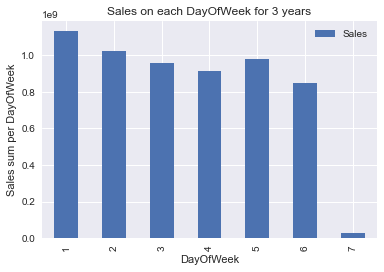

In [13]:
grouped_by_day = train_df.groupby('DayOfWeek')['Sales'].sum().to_frame()
# colors = ['g', 'b', 'g', 'w', 'r', 'b', 'y']
grouped_by_day.plot(kind='bar',
                        xlabel="DayOfWeek", 
                        ylabel='Sales sum per DayOfWeek', 
                        title='Sales on each DayOfWeek for 3 years',
                        label='DayOfWeek',)
                        # color=colors)
# grouped_by_day

The above plot shows each days sales sum through out the three years.

The highest sales is on Mondays and the Lowest is on Sundays. 
This observation is assuming the week day starts at Monday.

Next, I will group the data with Year in addition to the DayOfWeek to see if the pattern holds.

<AxesSubplot:title={'center':'Sales through the Years grouped by DayOfWeek'}, xlabel='Year and DayOfWeek', ylabel='Sales sum per DayOfWeek'>

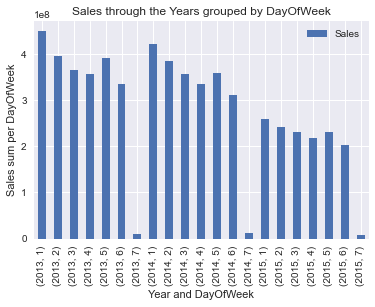

In [14]:

grouped_by_year_day = train_df.groupby(['Year', 'DayOfWeek'])['Sales'].sum().to_frame()
# colors = ['g', 'b', 'g', 'w', 'r', 'b', 'y']
grouped_by_year_day.plot.bar(xlabel="Year and DayOfWeek", 
                            ylabel='Sales sum per DayOfWeek', 
                            title='Sales through the Years grouped by DayOfWeek',)
                            # color=colors)


This shows us that the above trend holds. In addition, we can see that the sale has been decreasing through the years. 

Next, I will look at which stores are doing good based on `StoreType` and `Assortment`

### Group by `StoreType`

<AxesSubplot:xlabel='StoreType'>

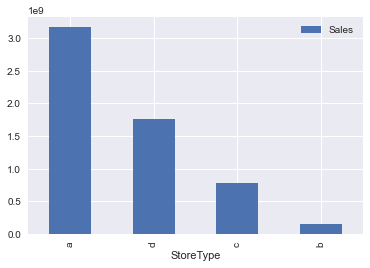

In [15]:
grouped_by_storetype = train_df.groupby('StoreType')['Sales'].sum().to_frame().sort_values(by='Sales', ascending=False)
# store_type_color = {'a': 'blue', 'b': 'red', 'c': 'green', 'd': 'teal'}
grouped_by_storetype.plot.bar()


<AxesSubplot:title={'center':'Sales through the Years grouped by StoreType'}, xlabel='Year and StoreType', ylabel='Sales sum per StoreType'>

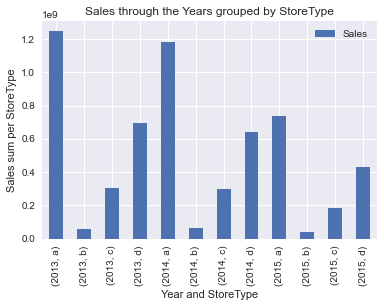

In [16]:
grouped_by_year_storetype = train_df.groupby(['Year', 'StoreType'])['Sales'].sum().to_frame()
grouped_by_year_storetype.plot.bar(xlabel="Year and StoreType", ylabel='Sales sum per StoreType', title='Sales through the Years grouped by StoreType')


In all three years, there is a trend. 

- Store 'a' has the highest sales. Then 'd', 'c', and 'b' in that order

### Groupby `Assortment`

<AxesSubplot:title={'center':'Sales through the Years grouped by Assortment'}, xlabel='Year and Assortment', ylabel='Sales sum per Assorment'>

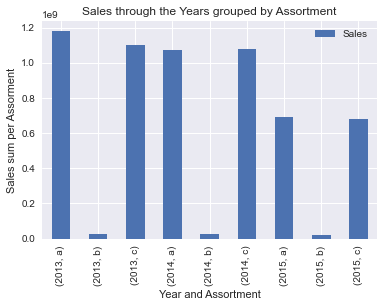

In [17]:
grouped_by_year_assortment = train_df.groupby(['Year', 'Assortment'])['Sales'].sum().to_frame()
grouped_by_year_assortment.plot.bar(xlabel="Year and Assortment", ylabel='Sales sum per Assorment', title='Sales through the Years grouped by Assortment')
